In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
diversity_metrics = pd.read_csv('all_diversity_imagenet.csv')

In [3]:
def ensure_unique_folders(df, threshold):
    """
    Ensures uniqueness of the "Folder" field in the dataframe.
    
    Args:
    - df (pd.DataFrame): The dataframe to process.
    - threshold (int): The maximum allowable value for "Count".
    
    Returns:
    - pd.DataFrame: A dataframe where the "Folder" field is unique, and 
                    the chosen row for each folder has the largest "Count" 
                    below the threshold.
    """

    # Filter rows where Count is less than the threshold
    df = df[df['Count'] <= threshold]

    # Sort by Folder and Count, then drop duplicates on Folder while keeping the last (highest Count)
    df = df.sort_values(by=['Folder', 'Count']).drop_duplicates(
        subset='Folder', keep='last')

    return df

In [4]:
diversity_metrics_extracted = ensure_unique_folders(diversity_metrics, 1000)
diversity_metrics_extracted

,Folder,Count,Vendi (vgg19-gram-resize),Dissimilarity (vgg19-gram-resize),Var (vgg19-gram-resize),Vendi (clip-L-14-padding),Dissimilarity (clip-L-14-padding),Var (clip-L-14-padding),Vendi (clip-L-14-crop),Dissimilarity (clip-L-14-crop),...,Var (dinov2-l-fb-crop),Vendi (dinov2-l-fb-padding),Dissimilarity (dinov2-l-fb-padding),Var (dinov2-l-fb-padding),Vendi (convnextv2-l-padding),Dissimilarity (convnextv2-l-padding),Var (convnextv2-l-padding),Vendi (convnextv2-l-crop),Dissimilarity (convnextv2-l-crop),Var (convnextv2-l-crop)
300,.,1000,10.042936,0.365663,396.264343,22.071489,0.512144,236.171204,22.855076,0.518572,...,2086.374512,172.721420,0.950304,2090.379395,85.428642,0.958691,289.965393,91.420837,0.972087,286.657654
210,n01440764,1000,3.779587,0.197269,272.059265,7.478056,0.307125,144.389603,8.046428,0.321186,...,988.540405,11.551155,0.454868,994.618408,2.466914,0.145893,42.875835,2.524282,0.149157,43.201851
24,n01443537,1000,4.947058,0.240838,365.704254,6.107549,0.272911,133.295197,6.150815,0.271333,...,863.023254,8.381521,0.396317,850.189819,2.616284,0.135457,40.531757,2.577304,0.133298,39.357136
273,n01484850,1000,6.108710,0.288717,110.055298,5.871580,0.273115,123.943398,5.663582,0.265703,...,1225.595093,14.255600,0.548454,1218.573853,3.533023,0.207535,66.217972,3.208204,0.197087,59.948494
15,n01491361,1000,5.003290,0.240350,63.783981,6.055379,0.279638,124.458801,6.176747,0.282096,...,1108.799194,10.243594,0.480313,1071.350830,5.509281,0.283386,95.918938,5.472026,0.280099,92.413910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,n02028035,1000,4.074680,0.207609,195.307190,4.865150,0.231519,102.456863,4.651162,0.222467,...,571.072144,6.199392,0.281320,631.295898,1.817912,0.090649,27.637049,1.818868,0.090016,26.174978
102,n02037110,1000,4.080565,0.209481,268.112152,5.263678,0.247524,110.679482,5.135399,0.242726,...,526.151428,5.786801,0.272978,606.065796,1.677937,0.076959,24.901945,1.582339,0.062652,18.064245
48,n02051845,1000,4.998334,0.243175,380.725067,6.908424,0.298717,138.650833,6.667971,0.292443,...,507.332153,5.858416,0.263020,562.622009,3.581101,0.195438,71.193016,3.662520,0.193489,62.686741
33,n02058221,1000,5.146242,0.254371,175.094315,6.945472,0.302875,134.155777,6.957250,0.301340,...,771.815552,8.818213,0.375153,815.493347,3.061950,0.175830,55.899841,2.970461,0.165416,46.443756


In [5]:
diversity_metrics_extracted[diversity_metrics_extracted['Folder']=='.']

,Folder,Count,Vendi (vgg19-gram-resize),Dissimilarity (vgg19-gram-resize),Var (vgg19-gram-resize),Vendi (clip-L-14-padding),Dissimilarity (clip-L-14-padding),Var (clip-L-14-padding),Vendi (clip-L-14-crop),Dissimilarity (clip-L-14-crop),...,Var (dinov2-l-fb-crop),Vendi (dinov2-l-fb-padding),Dissimilarity (dinov2-l-fb-padding),Var (dinov2-l-fb-padding),Vendi (convnextv2-l-padding),Dissimilarity (convnextv2-l-padding),Var (convnextv2-l-padding),Vendi (convnextv2-l-crop),Dissimilarity (convnextv2-l-crop),Var (convnextv2-l-crop)
300,.,1000,10.042936,0.365663,396.264343,22.071489,0.512144,236.171204,22.855076,0.518572,...,2086.374512,172.72142,0.950304,2090.379395,85.428642,0.958691,289.965393,91.420837,0.972087,286.657654


In [6]:
for row in diversity_metrics_extracted.head():
    print(row)

Folder
Count
Vendi (vgg19-gram-resize)
Dissimilarity (vgg19-gram-resize)
Var (vgg19-gram-resize)
Vendi (clip-L-14-padding)
Dissimilarity (clip-L-14-padding)
Var (clip-L-14-padding)
Vendi (clip-L-14-crop)
Dissimilarity (clip-L-14-crop)
Var (clip-L-14-crop)
Vendi (convnextv2-l-resize)
Dissimilarity (convnextv2-l-resize)
Var (convnextv2-l-resize)
Vendi (clip-L-14-resize)
Dissimilarity (clip-L-14-resize)
Var (clip-L-14-resize)
Vendi (dinov2-l-fb-resize)
Dissimilarity (dinov2-l-fb-resize)
Var (dinov2-l-fb-resize)
Vendi (dinov2-l-fb-crop)
Dissimilarity (dinov2-l-fb-crop)
Var (dinov2-l-fb-crop)
Vendi (dinov2-l-fb-padding)
Dissimilarity (dinov2-l-fb-padding)
Var (dinov2-l-fb-padding)
Vendi (convnextv2-l-padding)
Dissimilarity (convnextv2-l-padding)
Var (convnextv2-l-padding)
Vendi (convnextv2-l-crop)
Dissimilarity (convnextv2-l-crop)
Var (convnextv2-l-crop)


In [7]:
diversity_metrics_extracted.head()

,Folder,Count,Vendi (vgg19-gram-resize),Dissimilarity (vgg19-gram-resize),Var (vgg19-gram-resize),Vendi (clip-L-14-padding),Dissimilarity (clip-L-14-padding),Var (clip-L-14-padding),Vendi (clip-L-14-crop),Dissimilarity (clip-L-14-crop),...,Var (dinov2-l-fb-crop),Vendi (dinov2-l-fb-padding),Dissimilarity (dinov2-l-fb-padding),Var (dinov2-l-fb-padding),Vendi (convnextv2-l-padding),Dissimilarity (convnextv2-l-padding),Var (convnextv2-l-padding),Vendi (convnextv2-l-crop),Dissimilarity (convnextv2-l-crop),Var (convnextv2-l-crop)
300,.,1000,10.042936,0.365663,396.264343,22.071489,0.512144,236.171204,22.855076,0.518572,...,2086.374512,172.721420,0.950304,2090.379395,85.428642,0.958691,289.965393,91.420837,0.972087,286.657654
210,n01440764,1000,3.779587,0.197269,272.059265,7.478056,0.307125,144.389603,8.046428,0.321186,...,988.540405,11.551155,0.454868,994.618408,2.466914,0.145893,42.875835,2.524282,0.149157,43.201851
24,n01443537,1000,4.947058,0.240838,365.704254,6.107549,0.272911,133.295197,6.150815,0.271333,...,863.023254,8.381521,0.396317,850.189819,2.616284,0.135457,40.531757,2.577304,0.133298,39.357136
273,n01484850,1000,6.108710,0.288717,110.055298,5.871580,0.273115,123.943398,5.663582,0.265703,...,1225.595093,14.255600,0.548454,1218.573853,3.533023,0.207535,66.217972,3.208204,0.197087,59.948494
15,n01491361,1000,5.003290,0.240350,63.783981,6.055379,0.279638,124.458801,6.176747,0.282096,...,1108.799194,10.243594,0.480313,1071.350830,5.509281,0.283386,95.918938,5.472026,0.280099,92.413910


In [33]:
metrics_avg = {}

for col in diversity_metrics_extracted.columns:
    if col not in 'Folder':
        metrics_avg[col] = {}

In [34]:
metrics_avg

{'Count': {},
 'Vendi (vgg19-gram-resize)': {},
 'Dissimilarity (vgg19-gram-resize)': {},
 'Var (vgg19-gram-resize)': {},
 'Vendi (clip-L-14-padding)': {},
 'Dissimilarity (clip-L-14-padding)': {},
 'Var (clip-L-14-padding)': {},
 'Vendi (clip-L-14-crop)': {},
 'Dissimilarity (clip-L-14-crop)': {},
 'Var (clip-L-14-crop)': {},
 'Vendi (convnextv2-l-resize)': {},
 'Dissimilarity (convnextv2-l-resize)': {},
 'Var (convnextv2-l-resize)': {},
 'Vendi (clip-L-14-resize)': {},
 'Dissimilarity (clip-L-14-resize)': {},
 'Var (clip-L-14-resize)': {},
 'Vendi (dinov2-l-fb-resize)': {},
 'Dissimilarity (dinov2-l-fb-resize)': {},
 'Var (dinov2-l-fb-resize)': {},
 'Vendi (dinov2-l-fb-crop)': {},
 'Dissimilarity (dinov2-l-fb-crop)': {},
 'Var (dinov2-l-fb-crop)': {},
 'Vendi (dinov2-l-fb-padding)': {},
 'Dissimilarity (dinov2-l-fb-padding)': {},
 'Var (dinov2-l-fb-padding)': {},
 'Vendi (convnextv2-l-padding)': {},
 'Dissimilarity (convnextv2-l-padding)': {},
 'Var (convnextv2-l-padding)': {},
 'Ven

In [35]:
import os
from tqdm import tqdm

common_ref = diversity_metrics_extracted[diversity_metrics_extracted['Folder'] == "."].iloc[0]
print(common_ref)

for index, row in tqdm(diversity_metrics_extracted.iterrows()):
    folder_path = row['Folder']
    if folder_path == '.':
        continue  # Skip the root directory

    parts = folder_path.split(os.path.sep)

    if len(parts) == 2:
        types = ['all_artists', parts[0]]
        reference_rows = [common_ref,
                          diversity_metrics_extracted[
            diversity_metrics_extracted['Folder'] == parts[0]].iloc[0]]
    else:
        types = ['all_classes']
        reference_rows = [common_ref]

    for col in diversity_metrics_extracted.columns[1:]:
        for type_, reference_row in zip(types, reference_rows):
            if reference_row[col] == 0:  # Check to avoid division by zero
                ratio = 0
            else:
                ratio = row[col] / reference_row[col]
            # Storing the ratio and the name of the row
            if type_ not in metrics_avg[col]:
                metrics_avg[col][type_] = []
            metrics_avg[col][type_].append((folder_path, ratio))

Folder                                            .
Count                                          1000
Vendi (vgg19-gram-resize)                 10.042936
Dissimilarity (vgg19-gram-resize)          0.365663
Var (vgg19-gram-resize)                  396.264343
Vendi (clip-L-14-padding)                 22.071489
Dissimilarity (clip-L-14-padding)          0.512144
Var (clip-L-14-padding)                  236.171204
Vendi (clip-L-14-crop)                    22.855076
Dissimilarity (clip-L-14-crop)             0.518572
Var (clip-L-14-crop)                     244.780701
Vendi (convnextv2-l-resize)                 87.8647
Dissimilarity (convnextv2-l-resize)        0.970857
Var (convnextv2-l-resize)                285.589813
Vendi (clip-L-14-resize)                  22.102859
Dissimilarity (clip-L-14-resize)           0.512117
Var (clip-L-14-resize)                   243.885956
Vendi (dinov2-l-fb-resize)               171.306366
Dissimilarity (dinov2-l-fb-resize)         0.952819
Var (dinov2-

101it [00:00, 3667.43it/s]


In [36]:
sorted(metrics_avg['Var (vgg19-gram-resize)']['all_classes'], key=lambda x: x[1])

[('n01491361', 0.16096321157292492),
 ('n01601694', 0.2374026457108663),
 ('n01795545', 0.2609672355117025),
 ('n01496331', 0.2754102684756549),
 ('n01484850', 0.2777320233904437),
 ('n02018795', 0.2801904189440106),
 ('n01494475', 0.29114467773448777),
 ('n01798484', 0.30299902809363877),
 ('n01665541', 0.3247305886348566),
 ('n01632777', 0.3428550249946283),
 ('n01955084', 0.3527412072124385),
 ('n01796340', 0.36966527760556767),
 ('n01930112', 0.3903346530825681),
 ('n01498041', 0.4070572954972702),
 ('n01695060', 0.41068380774737206),
 ('n01776313', 0.41351408070519424),
 ('n01664065', 0.4188288759386944),
 ('n01675722', 0.4197232685318745),
 ('n01753488', 0.4347551635413433),
 ('n02018207', 0.43851741152533075),
 ('n02058221', 0.4418624020873652),
 ('n01770081', 0.4431045477054307),
 ('n01774384', 0.4443040665270674),
 ('n01685808', 0.4465052573048928),
 ('n01910747', 0.4518985289712039),
 ('n01622779', 0.47452519447753866),
 ('n01773549', 0.4752005615801256),
 ('n01630670', 0.483

In [37]:
# Convert the nested dictionary structure to a flat dataframe
df_list = []

for metric, categories in metrics_avg.items():
    for category, values in categories.items():
        labels, value_list = zip(*values)
        temp_df = pd.DataFrame({
            'Metric': [metric] * len(labels),
            'Category': category,
            'Diversity Ratio': value_list
        })
        df_list.append(temp_df)

full_df = pd.concat(df_list, ignore_index=True)


In [38]:
full_df

,Metric,Category,Diversity Ratio
0,Count,all_classes,1.000000
1,Count,all_classes,1.000000
2,Count,all_classes,1.000000
3,Count,all_classes,1.000000
4,Count,all_classes,1.000000
...,...,...,...
3095,Var (convnextv2-l-crop),all_classes,0.091311
3096,Var (convnextv2-l-crop),all_classes,0.063017
3097,Var (convnextv2-l-crop),all_classes,0.218682
3098,Var (convnextv2-l-crop),all_classes,0.162018


In [39]:
to_replace = {
    'Dissimilarity': 'IntDis',
    'clip-L-14': 'CLIP',
    'convnextv2-l-resize': 'ConvNeXt V2-scale',
    'convnextv2-l': 'ConvNeXt V2',
    'dinov2-l-fb': 'DINOv2',
    'vgg19-gram-resize': 'Vgg19',
    'resize': 'stretch',
    'padding': 'letterbox',
}

def rename_metric(metric_name):
    for key in to_replace:
        metric_name = metric_name.replace(key, to_replace[key])
    return metric_name

In [40]:
full_df = full_df[full_df['Metric'] != 'Count']
full_df = full_df[full_df['Category'] == 'all_classes']
full_df['Metric'] = full_df['Metric'].map(rename_metric)

# Sort the dataframe by Metric
full_df = full_df.sort_values(by='Metric')

In [41]:
len(diversity_metrics.columns)-1

31

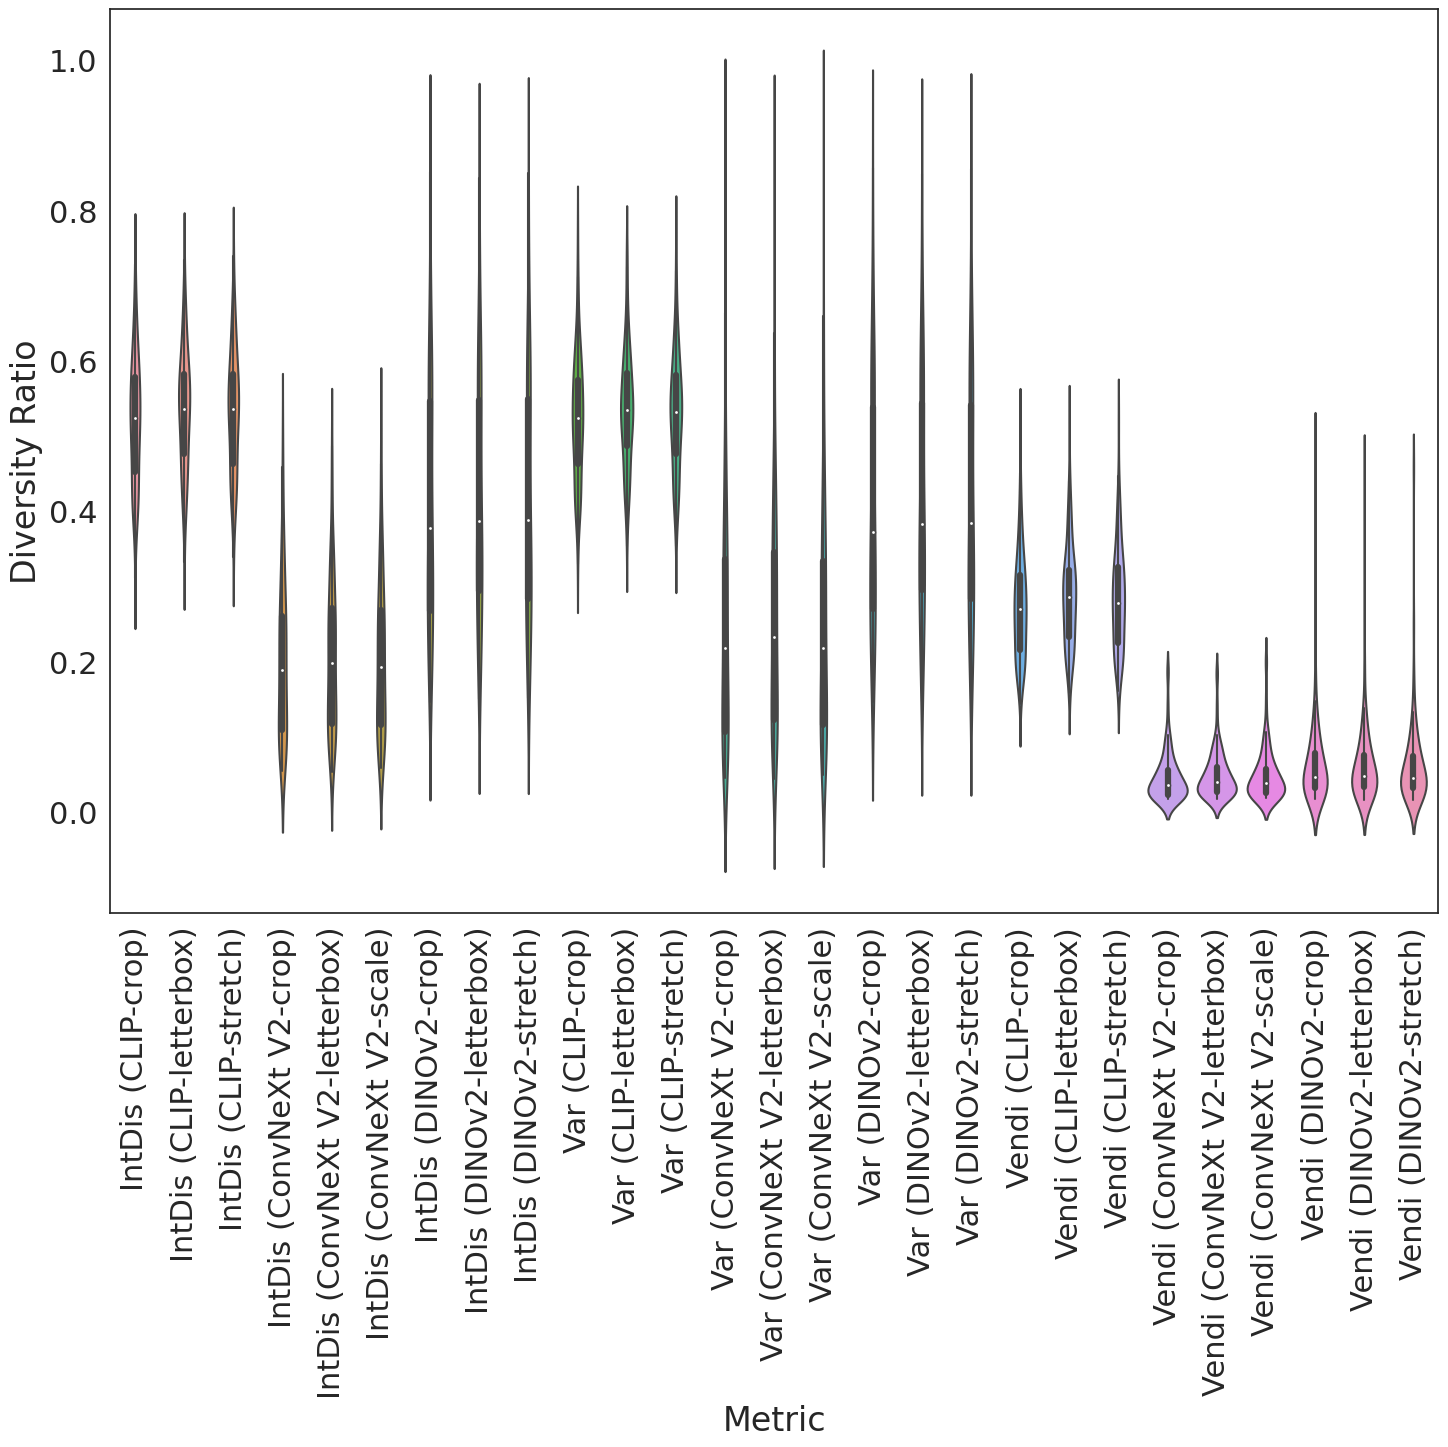

In [51]:
sns.set(style="white", font_scale=2)
plt.figure(figsize=(15, 15))

full_df_novgg = full_df[full_df['Metric'].apply(lambda x: 'Vgg' not in x)]
sns.violinplot(x='Metric', y='Diversity Ratio', data=full_df_novgg)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f'figures/paper/imagenet_resizing.pdf',
            bbox_inches='tight',
            pad_inches=0.05)

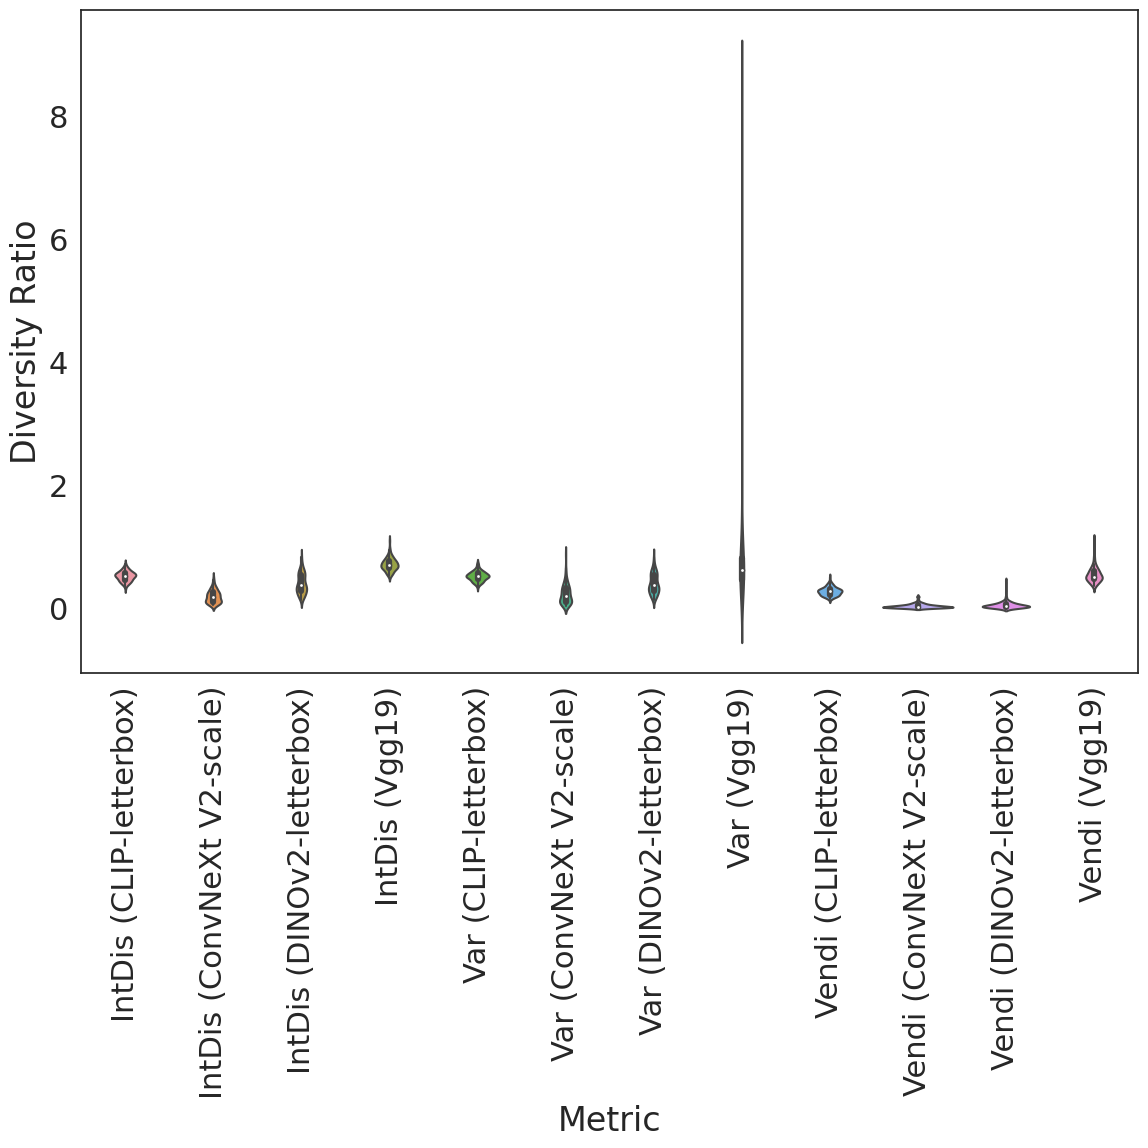

In [54]:
sns.set(style="white", font_scale=2)
plt.figure(figsize=(12, 12))

df_main = full_df[full_df['Metric'].apply(lambda x: not any(
    key in x for key in ['crop', 'stretch', 'ConvNeXt V2-letterbox']))]
sns.violinplot(x='Metric', y='Diversity Ratio', data=df_main)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f'figures/paper/imagenet_main.pdf',
            bbox_inches='tight',
            pad_inches=0.05)